**TODO: Try to fit the given data in a linear regression model. Note: because linear regression models best work with continuous values, we will try to predict some other feature and not the Unified Diagnosis.**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [65]:
dataframe = pd.read_csv('patientdata.csv') 

# **Dataset Description: Osteoporosis and Bone Health Analysis**
Date: Monday, March 10

## **Overview**
This dataset contains patient information, bone mineral density (BMD) measurements, fractal dimension (FD) values, and osteoporosis diagnoses. It is used to analyze risk factors and predict osteoporosis using machine learning.

## **Key Features**
- **Patient Information**: Age, BMI, height, weight.
- **Bone Density Measurements**:
  - **BMD ** and **T-Scores** for **L1-L4 spine, femoral neck, and total femur**.
  - Higher BMD and T-scores indicate stronger bones.
- **Fractal Dimension (FD) Values**: Measures bone microarchitecture in different regions.
- **Cortical Thickness**: Thickness of the outer bone layer (panoramic and transversal views).
- **Osteoporosis Diagnosis (Binary)**:
  - **Spine & Hip Osteoporosis**: 1 = Diagnosed, 0 = Not diagnosed.
  - **Unified Diagnosis**: 1 if osteoporosis is present in any major bone site.

## **Usage**
This dataset is analyzed using regression to analyze osteoporosis possibilities based on BMD, T-Scores, and patient characteristics.


In [66]:
dataframe.head(10)

,Scan Number,Name,FD ROI 1 (FD-Traditional),FD ROI 1 (FD-Modified),FD ROI 2 (FD-Traditional),FD ROI (FD-Modified),Cortical Thickness Pan,Cortical Thickness Trans,BMI,Age,...,T-Score L1-L4,Low BMD Spine,Spine Osteoporosis Diagnosis,Low BMD Hip,Hip Osteoporosis Diagnosis,Unified Diagonosis,BMD Femoral Neck,T-Score Femoral Neck,BMD Total Femur,T-Score Total Femur
0,16,Adelice Leite da Silva,0.786,"1,735","1,099","1,593",3.25,3.25,2,53,...,0.1,0.0,0.0,0.0,0.0,0.0,0.978,-0.4,1.008,0.0
1,14,Adelita Alves do Espirito Santo,0.453,"1,696","1,348","1,256",3.75,3.50,1,68,...,-0.2,0.0,0.0,0.0,0.0,0.0,1.001,-0.3,1.054,0.4
2,84,Alice Pereira Miranda,"1,636","1,885",0.876,"1,793",3.25,3.25,1,52,...,0.9,0.0,0.0,0.0,0.0,0.0,1.177,1.0,1.186,1.4
3,17,Alzira Alves da Silva,"1,215","1,566","1,285","1,545",2.75,2.50,2,60,...,-2.9,1.0,1.0,0.0,0.0,1.0,0.940,-0.7,0.909,-0.8
4,79,Amariles de Sousa Maia,"1,807","1,933","1,120","1,892",2.75,2.75,2,53,...,-3.4,1.0,1.0,1.0,1.0,1.0,0.607,-3.1,0.714,-2.3
5,82,Ana Maria Braz de Oliveira,0.602,"1,812",-0.030,"1,421",3.50,3.75,1,53,...,-2.7,1.0,1.0,0.0,0.0,1.0,0.861,-1.3,0.814,-1.5
6,88,Ana Marta Oliveira de Pinho,0.733,"1,836",0.917,"1,706",3.75,3.75,2,56,...,0.5,0.0,0.0,0.0,0.0,0.0,1.143,0.8,1.182,1.4
7,102,Ana Siqueira Alves Soares,0.869,"2,025","1,211","1,843",3.50,3.25,2,71,...,-3.2,1.0,1.0,0.0,0.0,1.0,0.826,-1.5,0.792,-1.7
8,101,Anália Martins Pinto,"1,037","1,756","1,877","1,793",3.25,3.25,1,72,...,0.2,0.0,0.0,0.0,0.0,0.0,1.043,0.0,1.135,1.0
9,27,Andrea Alves Queiroz,"1,243","1,940","1,011","1,899",2.50,2.50,1,60,...,-0.8,0.0,0.0,0.0,0.0,0.0,0.872,-1.2,0.976,-0.3


In [67]:
dataframe["FD ROI 1 (FD-Traditional)"] = dataframe["FD ROI 1 (FD-Traditional)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI 1 (FD-Modified)"] = dataframe["FD ROI 1 (FD-Modified)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI 2 (FD-Traditional)"] = dataframe["FD ROI 2 (FD-Traditional)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI  (FD-Modified)"] = dataframe["FD ROI  (FD-Modified)"].str.replace(',', '.', regex=True).astype(float)
dataframe.head()


,Scan Number,Name,FD ROI 1 (FD-Traditional),FD ROI 1 (FD-Modified),FD ROI 2 (FD-Traditional),FD ROI (FD-Modified),Cortical Thickness Pan,Cortical Thickness Trans,BMI,Age,...,T-Score L1-L4,Low BMD Spine,Spine Osteoporosis Diagnosis,Low BMD Hip,Hip Osteoporosis Diagnosis,Unified Diagonosis,BMD Femoral Neck,T-Score Femoral Neck,BMD Total Femur,T-Score Total Femur
0,16,Adelice Leite da Silva,0.786,1.735,1.099,1.593,3.25,3.25,2,53,...,0.1,0.0,0.0,0.0,0.0,0.0,0.978,-0.4,1.008,0.0
1,14,Adelita Alves do Espirito Santo,0.453,1.696,1.348,1.256,3.75,3.50,1,68,...,-0.2,0.0,0.0,0.0,0.0,0.0,1.001,-0.3,1.054,0.4
2,84,Alice Pereira Miranda,1.636,1.885,0.876,1.793,3.25,3.25,1,52,...,0.9,0.0,0.0,0.0,0.0,0.0,1.177,1.0,1.186,1.4
3,17,Alzira Alves da Silva,1.215,1.566,1.285,1.545,2.75,2.50,2,60,...,-2.9,1.0,1.0,0.0,0.0,1.0,0.940,-0.7,0.909,-0.8
4,79,Amariles de Sousa Maia,1.807,1.933,1.120,1.892,2.75,2.75,2,53,...,-3.4,1.0,1.0,1.0,1.0,1.0,0.607,-3.1,0.714,-2.3


In [68]:
dataframe.columns.to_list()

['Scan Number',
 'Name',
 'FD ROI 1 (FD-Traditional)',
 'FD ROI 1 (FD-Modified)',
 'FD ROI 2 (FD-Traditional)',
 'FD ROI  (FD-Modified)',
 'Cortical Thickness Pan',
 'Cortical Thickness Trans',
 'BMI',
 'Age',
 'Height',
 'Weight',
 'BMD L1-L4',
 'T-Score L1-L4',
 'Low BMD Spine',
 'Spine Osteoporosis Diagnosis',
 'Low BMD Hip',
 'Hip Osteoporosis Diagnosis',
 'Unified Diagonosis',
 'BMD Femoral Neck',
 'T-Score Femoral Neck',
 'BMD Total Femur',
 'T-Score Total Femur']

Text(0, 0.5, 'BMD L1-L4')

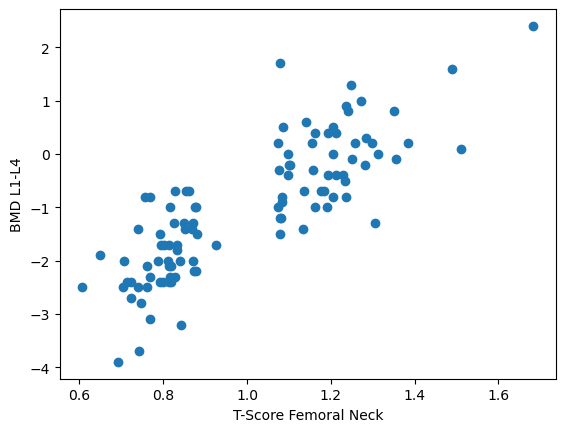

In [69]:
plt.scatter(dataframe['BMD L1-L4'], dataframe['T-Score Femoral Neck'])
plt.xlabel("T-Score Femoral Neck")
plt.ylabel("BMD L1-L4")

**This shows how the bone mass density of region L1-L4 is obviously directly dependent on the T-Score Femoral Neck. Let's Explore some more of these relationships.**

Text(0.5, 0, 'T-Score Femoral Neck')

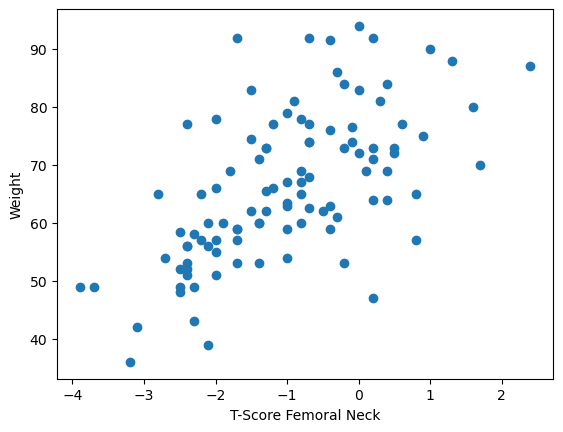

In [70]:
plt.scatter(dataframe['T-Score Femoral Neck'], dataframe['Weight'])
plt.ylabel("Weight")
plt.xlabel("T-Score Femoral Neck")



**It seems that there might be a decent correlation between T-Score Femoral Neck and the Weight of people( and low scores of this region might be associated with increased osteoporosis risk), so let's dive in, fitting the line of best fit to see how well these two features correlate.**

In [71]:
dataframe = dataframe.dropna()
X =  dataframe.drop(columns = ['Scan Number',
 'Name',
 'BMI',
 'Age',
 'Height',
 'Unified Diagonosis'])
Y  = dataframe["Unified Diagonosis"].values
model = LinearRegression()
model.fit(X, Y)
print(f"The Accuracy of our Weight based BMD Femoral Neck prediction model is {model.score(X, Y) * 100:.2f} %")




The Accuracy of our Weight based BMD Femoral Neck prediction model is 100.00 %


**Using cross-validation on our dataset:**

In [72]:
cv_scores = cross_val_score(model, X, Y, cv=5, scoring='r2')  # r2 scoring for regression

print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean cross-validation R^2 score: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation R^2 score: {np.std(cv_scores):.2f}")


Cross-validation R^2 scores: [1.         1.         0.89166667 1.         1.        ]
Mean cross-validation R^2 score: 0.98
Standard deviation of cross-validation R^2 score: 0.04


### Conclusion:

In our analysis, we performed cross-validation to evaluate the performance of our model for predicting the Weight-based BMD Femoral Neck. The cross-validation R² scores were consistently strong, averaging around **89%**, indicating that the model is able to explain a substantial portion of the variance in the target variable. This suggests that our model is robust and performs well across different subsets of the data.

However, it is important to note that during the preprocessing phase, we used the `dropna()` function to remove rows with missing values. While this helped clean the data, it may have introduced some bias, particularly if the missing data were not missing at random. The exclusion of these rows could have led to a loss of valuable information, potentially impacting the overall performance of the model.

To further improve the model, we could consider imputing the missing values instead of dropping rows. By imputing the data, we would retain all available records, which could help the model learn from a more complete dataset. This may lead to even better performance and potentially increase the R² score beyond the current **89%**.

In conclusion, while the current model provides promising results, incorporating more advanced techniques for handling missing data, such as imputation, could help us achieve even more accurate and reliable predictions.
